<a href="https://colab.research.google.com/github/husseinlopez/biologia/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al análisis de datos con Python

Notebook preparado por el Dr. Irvin Hussein López Nava

Datos proporcionados por el Dr. Stephen Bullock

### Instalación de algunas librerías iniciales

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Cargar y mostrar datos

In [2]:
# Enlace a los datos
url = 'https://raw.githubusercontent.com/husseinlopez/biologia/main/datosEM.csv'
# Importar datos a una tabla
df = pd.read_csv(url)
# Mostrar los primeros registros de los datos
print(df.head())
print(" \nCount total NaN at each column: \n", df.isnull().sum())

   serial#      Date  DOY  4 Tav1  4 Tav2  4 VPDav   4 SWC  4 GRav  4 GRmx  \
0        1  30/09/17  273    26.4     NaN      NaN     NaN     NaN     NaN   
1        2  08/10/17  281    22.9    25.8    2.615  0.0142   670.4   794.1   
2        3  16/10/17  289    24.1    31.2    3.663  0.0138   602.5   772.9   
3        4  24/10/17  297    26.6     NaN    3.054     NaN     NaN     NaN   
4        5  01/11/17  305    22.6     NaN    1.357     NaN     NaN     NaN   

   4 IG 8d  ...  6 IG 8d  6 GPPm  6 FPARm  5 Tav  5 Tmax  5 RHmin  5 VPDav  \
0    15.38  ...    24.07    12.4     0.23    NaN     NaN      NaN      NaN   
1    11.77  ...    21.61    13.4     0.26   19.0    29.1     31.5      1.3   
2    10.42  ...    25.25     8.3     0.22   21.5    31.9     22.5      2.0   
3    12.85  ...    26.59     7.3     0.22   20.6    30.1     29.3      1.7   
4    10.96  ...      NaN     8.9     0.12   15.3    23.3     47.8      0.6   

   5 IG 8d  5 GPPm  5 FPARm  
0     8.26    14.4     0.27  
1 

### Descripción de los datos

* Los datos son promedios de varios días (en general, 8 días) de los valores promedios o extremos diarios
* DOY es día del año calendario
* 4, 5 o 6 enfrente de las variables identifica el sitio
* Tav (°C) refiere a temperatura promedio (datos por minuto, promediados por medias horas luego por 24 hrs)
* Tmax (°C) refiere a la más alta temperatura promedio de media hora del día (24 hrs)
* VPDav (Pascales) refiere al promedio del déficit de la presión del vapor de agua en el aire (datos diurnas solamente, por minuto, promediados por medias horas luego por el día)
* SWC  (proporción, m3 m-3) refiere al contenido volumétrico de agua en el suelo (proporción), con datos de las 24 hrs
* GRav (W m-2) refiere al promedio de la radiación global en horas diurnas
* GRmx (W m-2) refiere al máximo valor de media hora de la radiación global en horas diurnas
* IG (índice de verdor) refiere al máximo valor tomado de varias fotos digitales de entre 0730 y 1630.
* GPPec (kg m-2 8días-1) captura de CO2 por el ecosistema estimado de por instrumentos terrestres+modelos del método de covarianza de turbulinas
* GPPm  (kg m-2 8dias-1) captura de CO2 por el ecosistema estimado de por instrumentos satelitales (un valor por día)+modelos del método MODIS17A
* FPARm (proporción) refiere a la fracción absorbida de la luz fotosintéticamente activa, un valor diario por percepción desde satelite



# Análisis exploratorio de los datos

Comencemos con los datos registrados para el Sitio 4

### Gráficas individuales por variable en función del tiempo

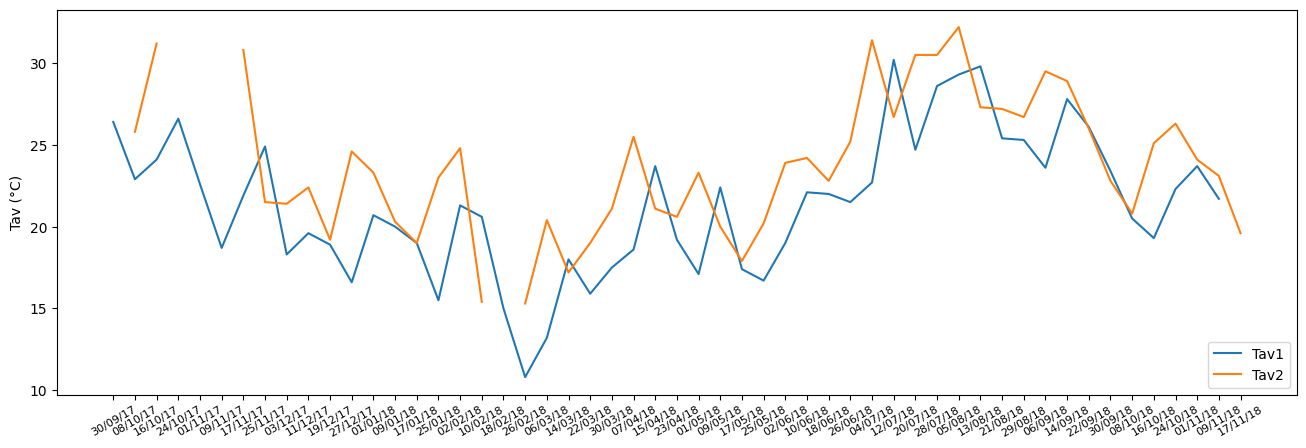

In [3]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafican las dos variables de temperatura
plt.plot(df['Date'], df['4 Tav1'])
plt.plot(df['Date'], df['4 Tav2'])
# Parámetros adicionales para la gráficas
plt.legend(["Tav1", "Tav2"], loc ="lower right")
plt.ylabel('Tav (°C)')
plt.xticks(rotation=30, fontsize=8);

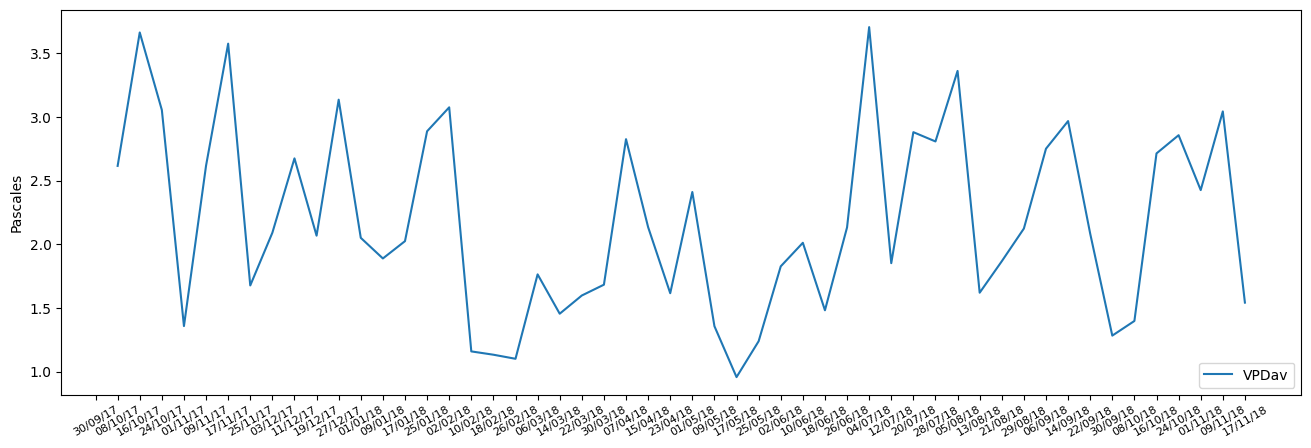

In [4]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica la déficit de presión
plt.plot(df['Date'], df['4 VPDav'])
# Parámetros adicionales para la gráficas
plt.legend(["VPDav"], loc ="lower right")
plt.ylabel('Pascales')
plt.xticks(rotation=30, fontsize=8);

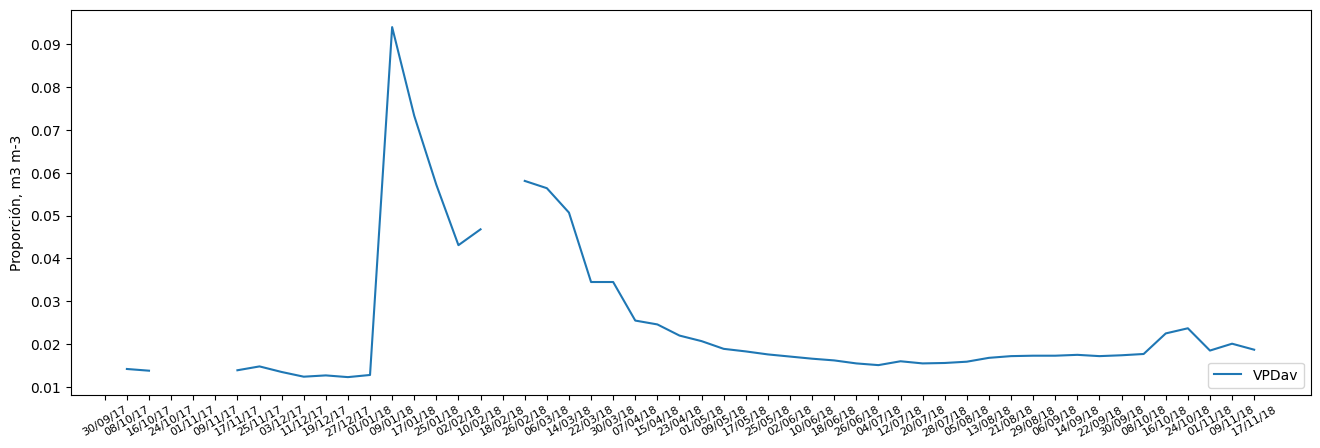

In [5]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica el contenido volimétrico del agua
plt.plot(df['Date'], df['4 SWC'])
# Parámetros adicionales para la gráficas
plt.legend(["VPDav"], loc ="lower right")
plt.ylabel('Proporción, m3 m-3')
plt.xticks(rotation=30, fontsize=8);

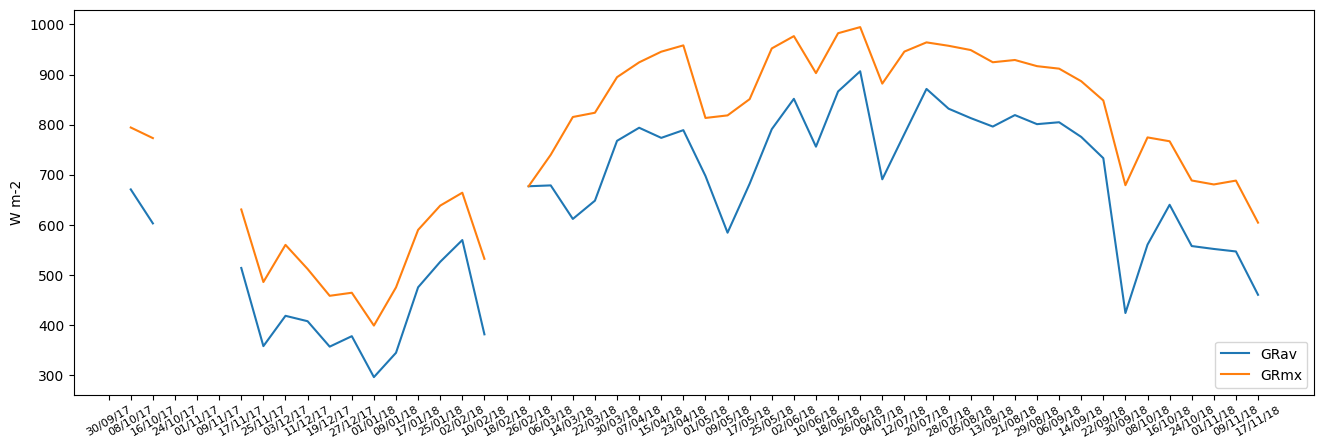

In [6]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafican las dos variables de radiación global
plt.plot(df['Date'], df['4 GRav'])
plt.plot(df['Date'], df['4 GRmx'])
# Parámetros adicionales para la gráficas
plt.legend(["GRav", "GRmx"], loc ="lower right")
plt.ylabel('W m-2')
plt.xticks(rotation=30, fontsize=8);

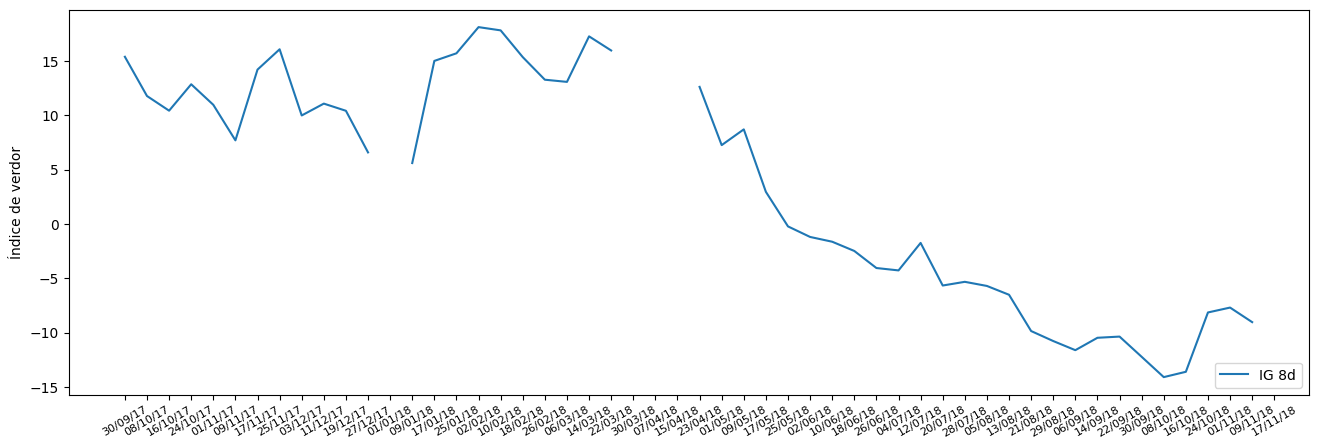

In [7]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica el índice de verdor
plt.plot(df['Date'], df['4 IG 8d'])
# Parámetros adicionales para la gráficas
plt.legend(["IG 8d"], loc ="lower right")
plt.ylabel('Índice de verdor')
plt.xticks(rotation=30, fontsize=8);

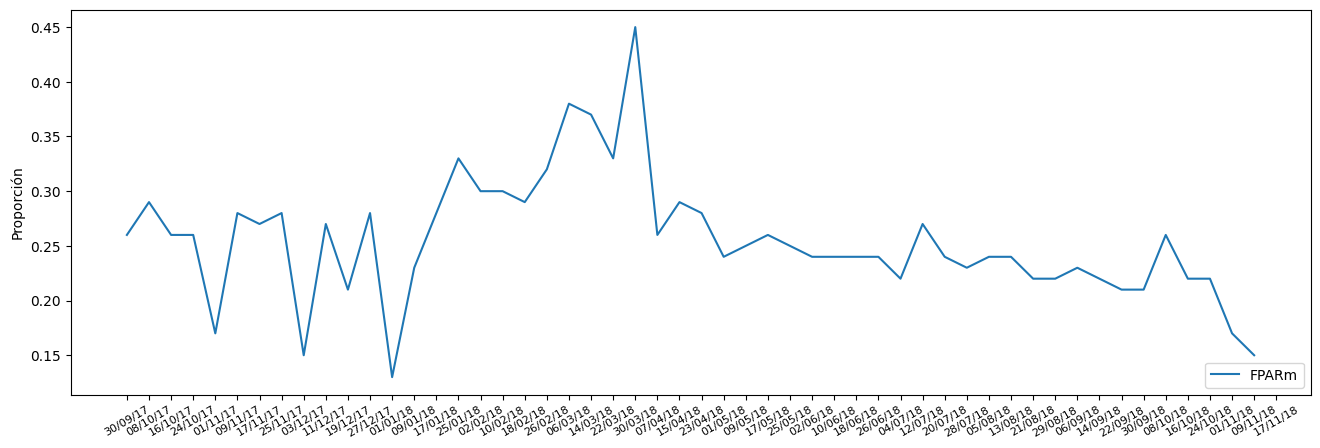

In [8]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafica la fracción absorbida de la luz
plt.plot(df['Date'], df['4 FPARm'])
# Parámetros adicionales para la gráficas
plt.legend(["FPARm"], loc ="lower right")
plt.ylabel('Proporción')
plt.xticks(rotation=30, fontsize=8);

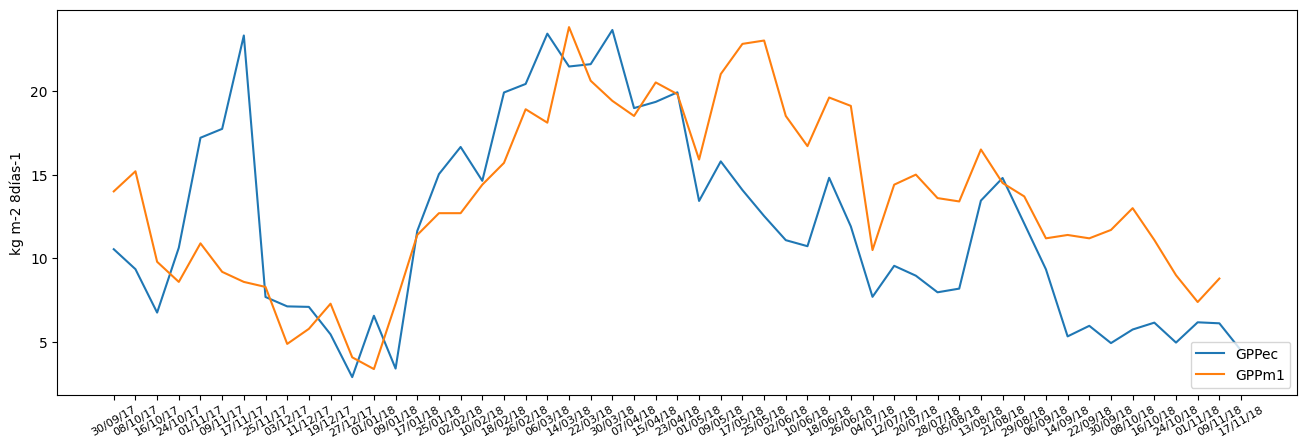

In [9]:
# Se define el tamaño del gráfico
fig = plt.subplots(figsize=(16, 5))

# Se grafican las dos variables de captura de CO2 por el ecosistema
plt.plot(df['Date'], df['4 GPPec'])
plt.plot(df['Date'], df['4 GPPm1'])
# Parámetros adicionales para la gráficas
plt.legend(["GPPec", "GPPm1"], loc ="lower right")
plt.ylabel('kg m-2 8días-1')
plt.xticks(rotation=30, fontsize=8);

### Distribución de los datos por variable

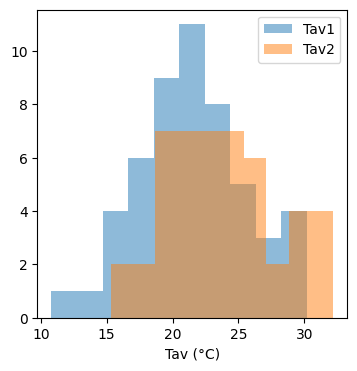

In [10]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 Tav1'], alpha=0.5);
plt.hist(df['4 Tav2'], alpha=0.5);
plt.legend(["Tav1", "Tav2"], loc ="upper right")
plt.xlabel('Tav (°C)');

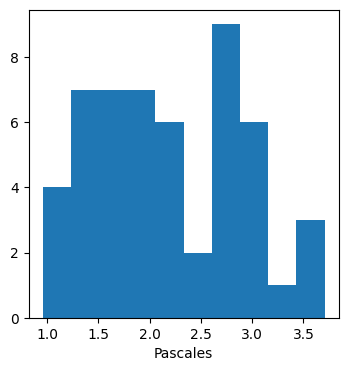

In [11]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 VPDav']);
plt.xlabel('Pascales');

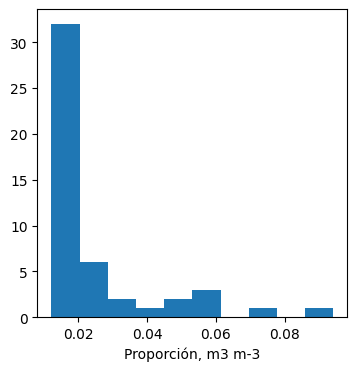

In [12]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 SWC']);
plt.xlabel('Proporción, m3 m-3');

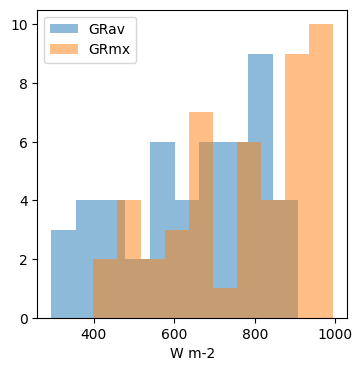

In [13]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 GRav'], alpha=0.5);
plt.hist(df['4 GRmx'], alpha=0.5);
plt.legend(["GRav", "GRmx"], loc ="upper left")
plt.xlabel('W m-2');

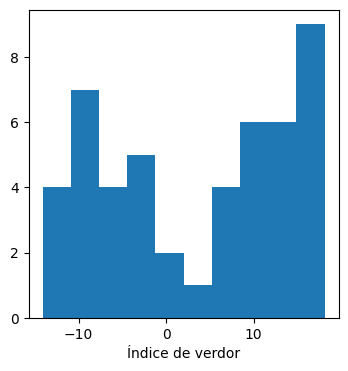

In [14]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 IG 8d']);
plt.xlabel('Índice de verdor');

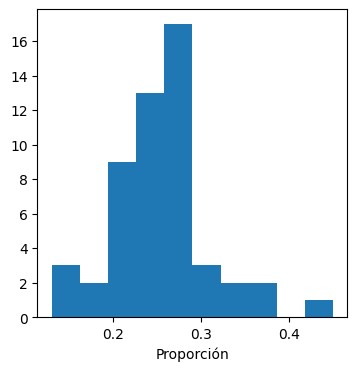

In [15]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 FPARm']);
plt.xlabel('Proporción');

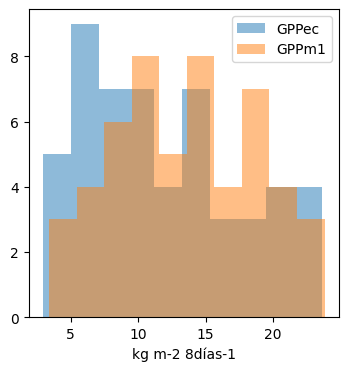

In [16]:
fig = plt.subplots(figsize=(4, 4))
plt.hist(df['4 GPPec'], alpha=0.5);
plt.hist(df['4 GPPm1'], alpha=0.5);
plt.legend(["GPPec", "GPPm1"], loc ="upper right")
plt.xlabel('kg m-2 8días-1');

### Análisis de correlación entre variables

<Axes: >

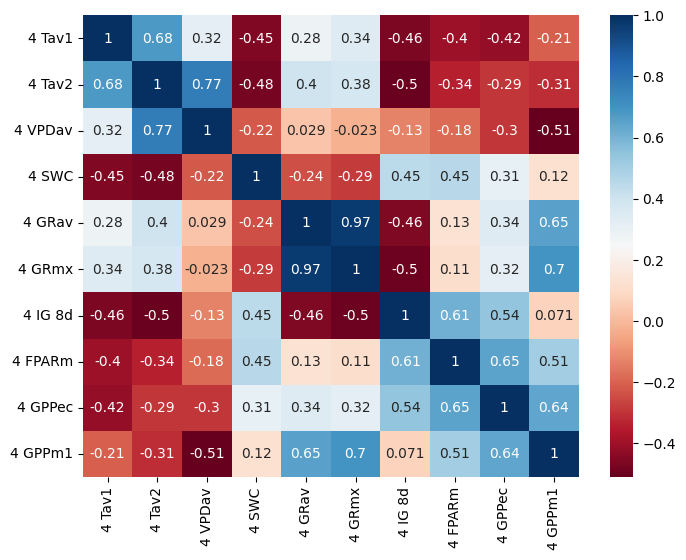

In [17]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
fig = plt.subplots(figsize=(8, 6))

# Correlación entre variables del sitio 4
df4 = df[['4 Tav1', '4 Tav2', '4 VPDav', '4 SWC', '4 GRav', '4 GRmx', '4 IG 8d', '4 FPARm', '4 GPPec', '4 GPPm1']]
cor = df4.corr()
sns.heatmap(cor, annot = True, cmap="RdBu")

### Relación de las variables respecto a GPPec

Plot data and a linear regression model fit.

* default, estimate linear regression model.
* order=2, estimate a polynomial regression. Fit a higher-order polynomial regression to capture nonlinear trends.
* logx=True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space.
* lowess=True, estimate a nonparametric lowess model (locally weighted linear regression).

https://seaborn.pydata.org/generated/seaborn.regplot.html

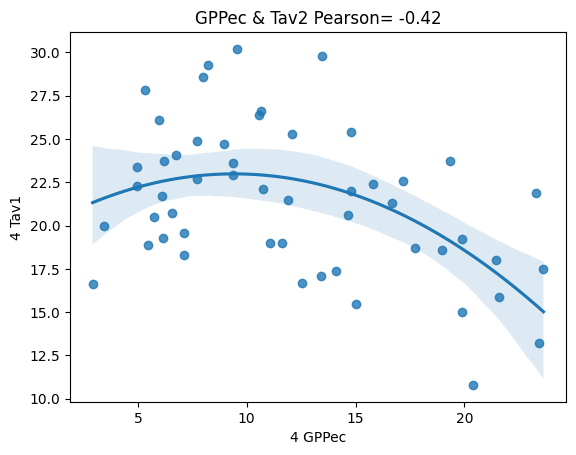

In [18]:
sns.regplot(x='4 GPPec', y='4 Tav1', data=df4, order=2);
pearson = cor.iloc[0, 8]
plt.title("GPPec & Tav2 Pearson= {0:.2f}".format(pearson));

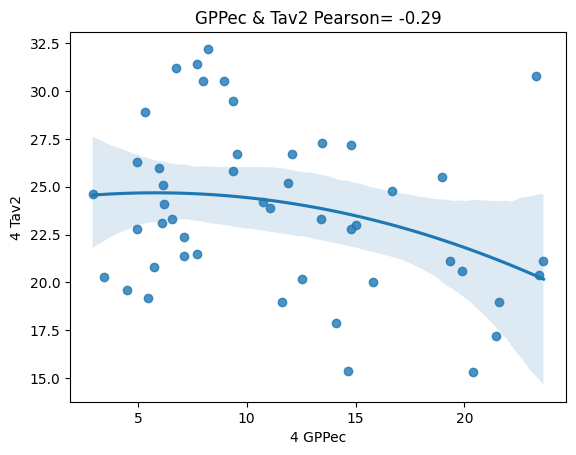

In [19]:
sns.regplot(x='4 GPPec', y='4 Tav2', data=df4, order=2);
pearson = cor.iloc[1, 8]
plt.title("GPPec & Tav2 Pearson= {0:.2f}".format(pearson));

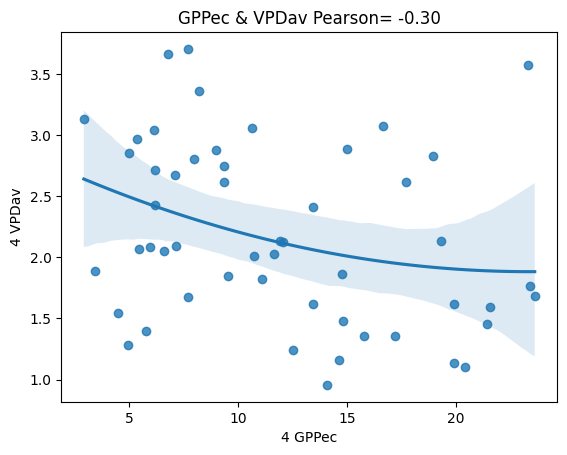

In [20]:
sns.regplot(x='4 GPPec', y='4 VPDav', data=df4, order=2);
pearson = cor.iloc[2, 8]
plt.title("GPPec & VPDav Pearson= {0:.2f}".format(pearson));

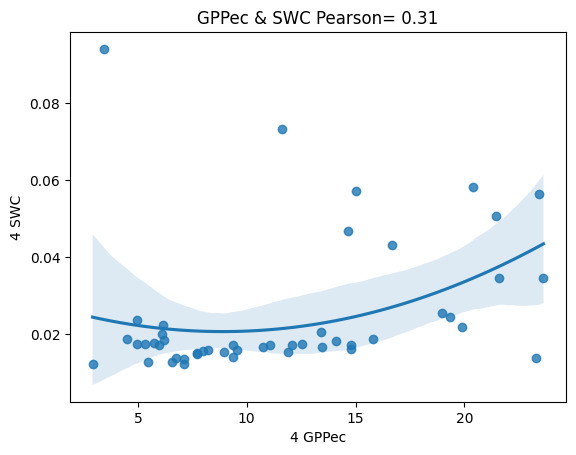

In [21]:
sns.regplot(x='4 GPPec', y='4 SWC', data=df4, order=2);
pearson = cor.iloc[3, 8]
plt.title("GPPec & SWC Pearson= {0:.2f}".format(pearson));

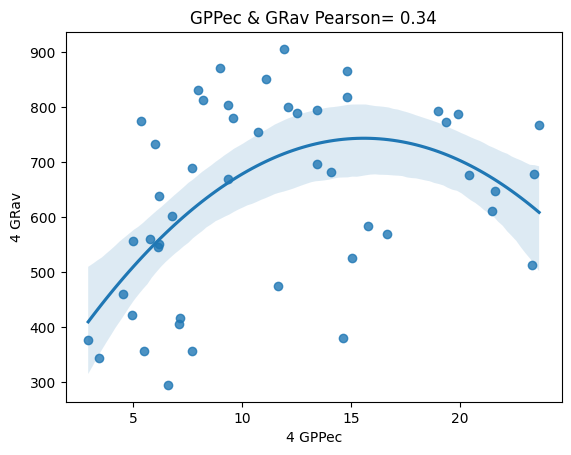

In [22]:
sns.regplot(x='4 GPPec', y='4 GRav', data=df4, order=2);
pearson = cor.iloc[4, 8]
plt.title("GPPec & GRav Pearson= {0:.2f}".format(pearson));

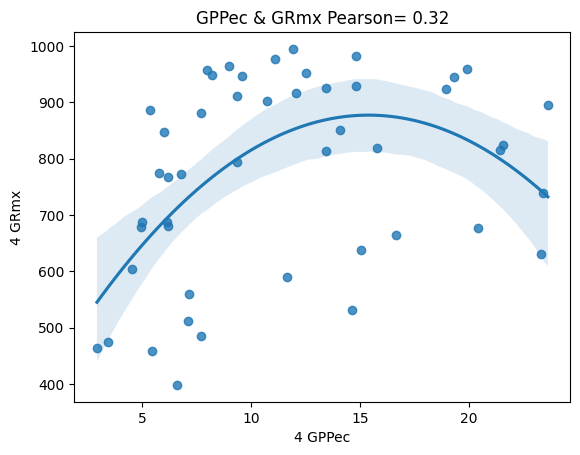

In [23]:
sns.regplot(x='4 GPPec', y='4 GRmx', data=df4, order=2);
pearson = cor.iloc[5, 8]
plt.title("GPPec & GRmx Pearson= {0:.2f}".format(pearson));

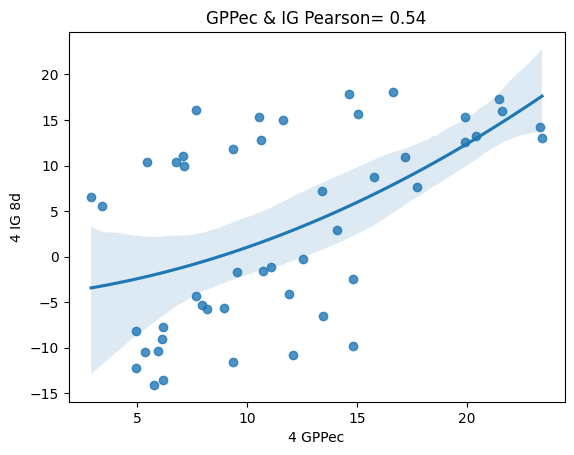

In [24]:
sns.regplot(x='4 GPPec', y='4 IG 8d', data=df4, order=2);
pearson = cor.iloc[6, 8]
plt.title("GPPec & IG Pearson= {0:.2f}".format(pearson));

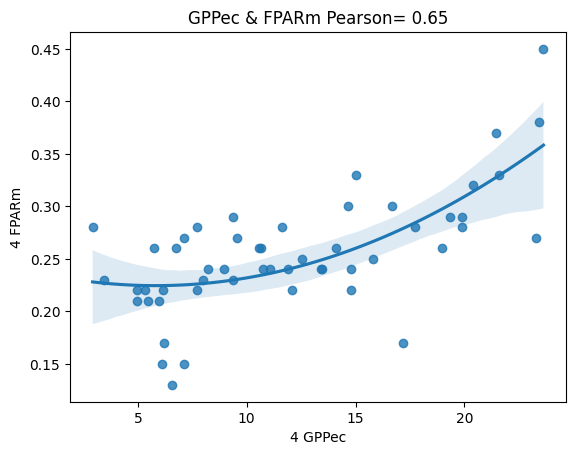

In [25]:
sns.regplot(x='4 GPPec', y='4 FPARm', data=df4, order=2);
pearson = cor.iloc[7, 8]
plt.title("GPPec & FPARm Pearson= {0:.2f}".format(pearson));

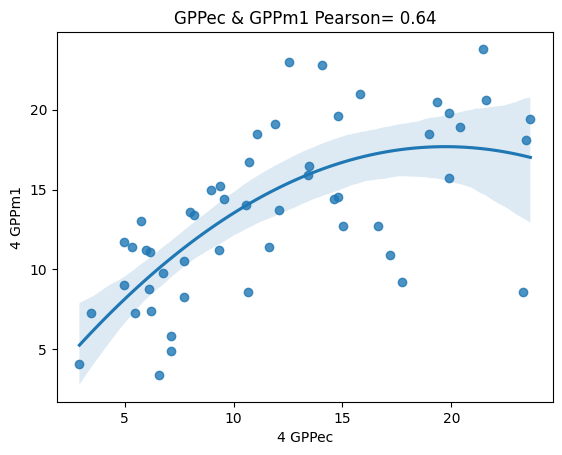

In [26]:
sns.regplot(x='4 GPPec', y='4 GPPm1', data=df4, order=2);
pearson = cor.iloc[9, 8]
plt.title("GPPec & GPPm1 Pearson= {0:.2f}".format(pearson));

## Visualización avanzada

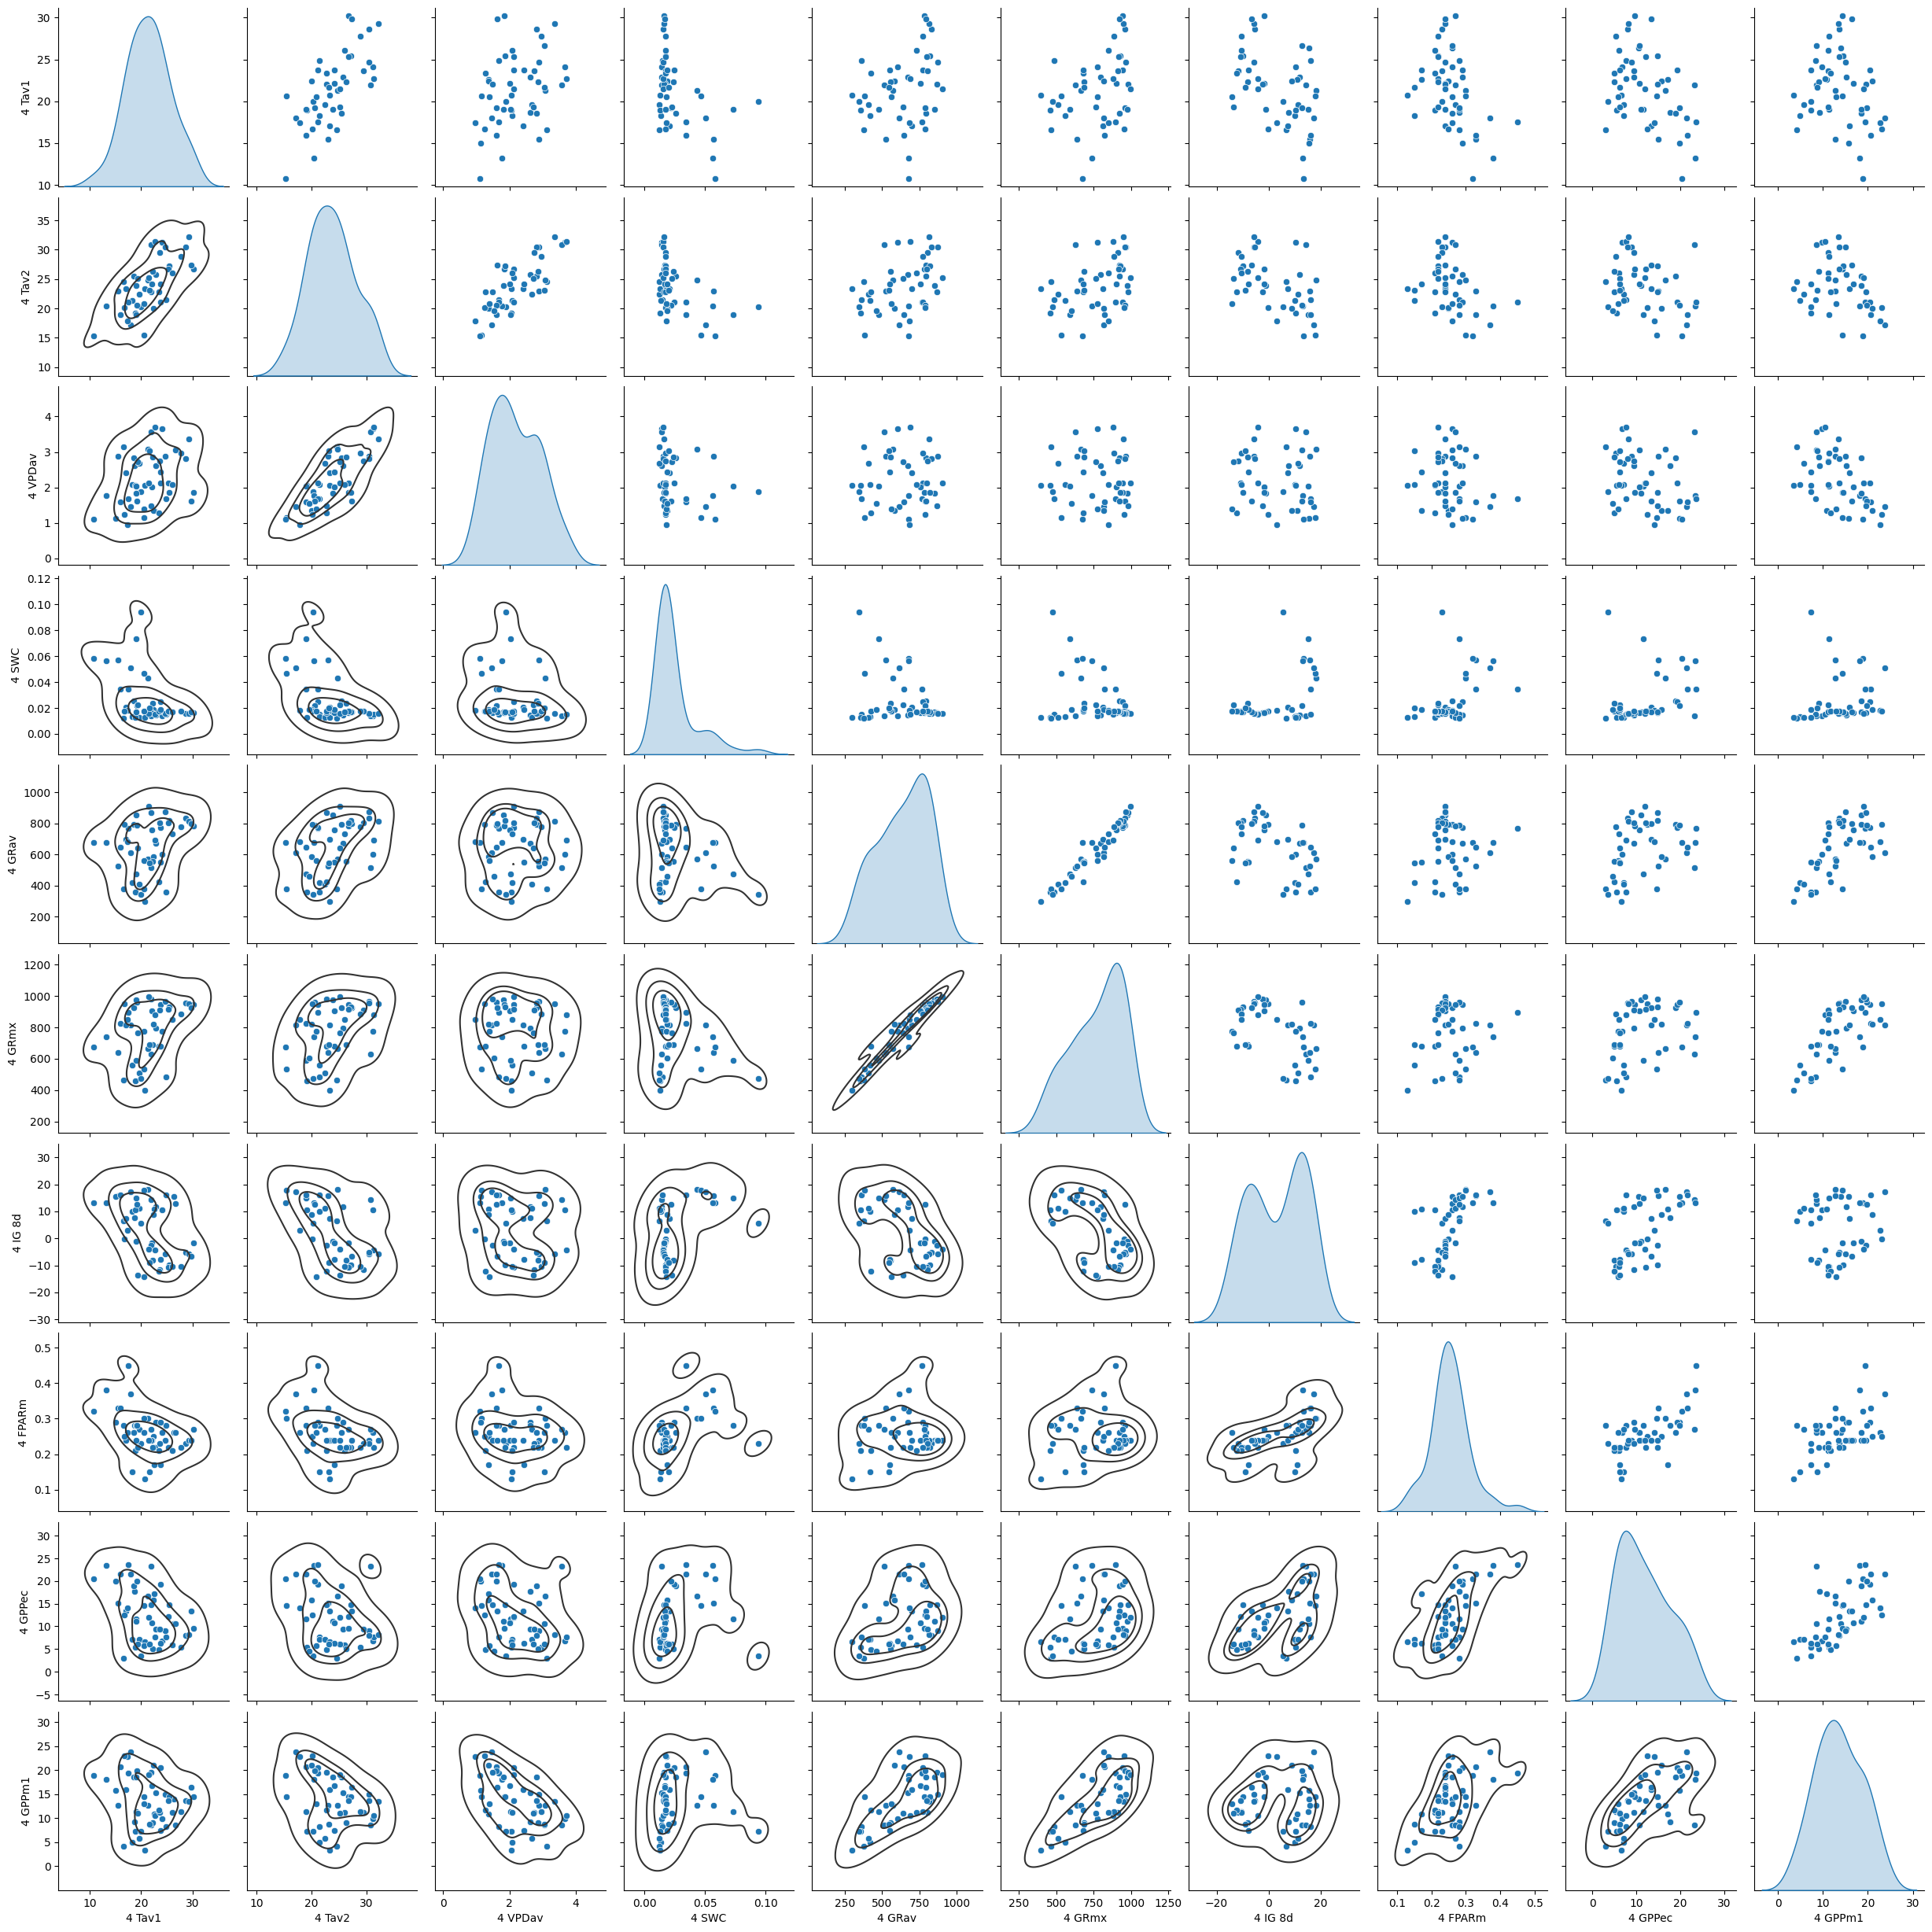

In [27]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
g = sns.pairplot(df4, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Procesamiento de datos

### Tratamiento para datos faltantes

Fill NaN values using an interpolation method.

method : str, default 'linear'

Interpolation technique to use. One of:

* 'linear': Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.
* 'time': Works on daily and higher resolution data to interpolate given length of interval.
* 'index', 'values': use the actual numerical values of the index.
* 'pad': Fill in NaNs using existing values.
* 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'polynomial': Passed to scipy.interpolate.interp1d, whereas 'spline' is passed to scipy.interpolate.UnivariateSpline. These methods use the numerical values of the index. Both 'polynomial' and 'spline' require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [28]:
# Volver a ejecutar después de cambiar el método de interpolación
df4 = df[['4 Tav1', '4 Tav2', '4 VPDav', '4 SWC', '4 GRav', '4 GRmx', '4 IG 8d', '4 FPARm', '4 GPPec', '4 GPPm1']]
print(" \nCount total NaN at each column: \n", df4.isnull().sum())

 
Count total NaN at each column: 
 4 Tav1     1
4 Tav2     5
4 VPDav    1
4 SWC      5
4 GRav     5
4 GRmx     5
4 IG 8d    5
4 FPARm    1
4 GPPec    0
4 GPPm1    1
dtype: int64


In [29]:
#df4.interpolate(method ='linear', limit_direction ='backward', inplace=True) # backward, forward
df4.interpolate(method ='polynomial', order = 2, inplace=True)
print(" \nCount total NaN at each column: \n", df4.isnull().sum())

 
Count total NaN at each column: 
 4 Tav1     1
4 Tav2     1
4 VPDav    1
4 SWC      1
4 GRav     1
4 GRmx     1
4 IG 8d    1
4 FPARm    1
4 GPPec    0
4 GPPm1    1
dtype: int64


<ipython-input-29-56346bf10acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.interpolate(method ='polynomial', order = 2, inplace=True)


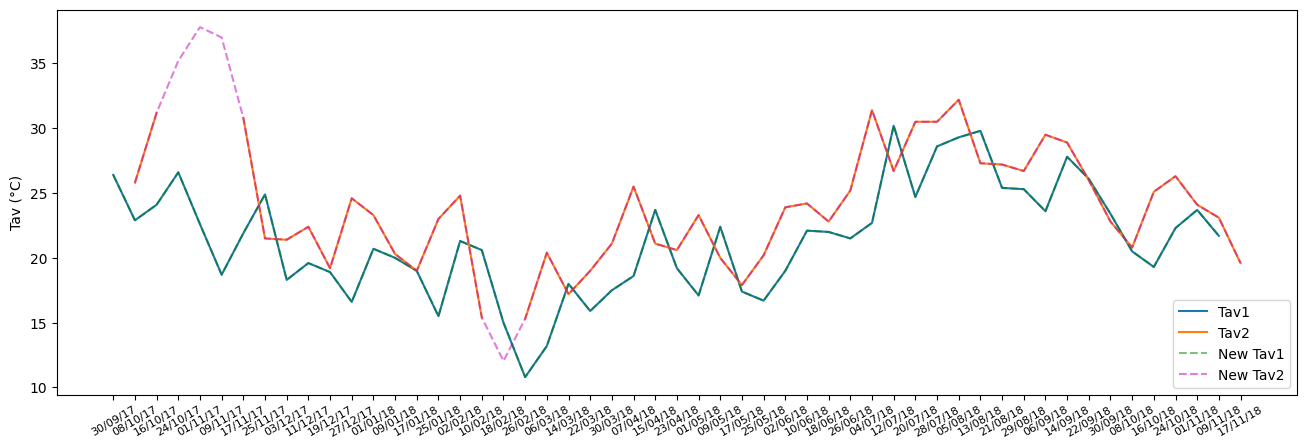

In [30]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 Tav1'])
plt.plot(df['Date'], df['4 Tav2'])
plt.plot(df['Date'], df4['4 Tav1'], '--g', alpha = 0.5)
plt.plot(df['Date'], df4['4 Tav2'], '--m', alpha = 0.5)
plt.legend(["Tav1", "Tav2", "New Tav1", "New Tav2"], loc ="lower right")
plt.ylabel('Tav (°C)')
plt.xticks(rotation=30, fontsize=8);

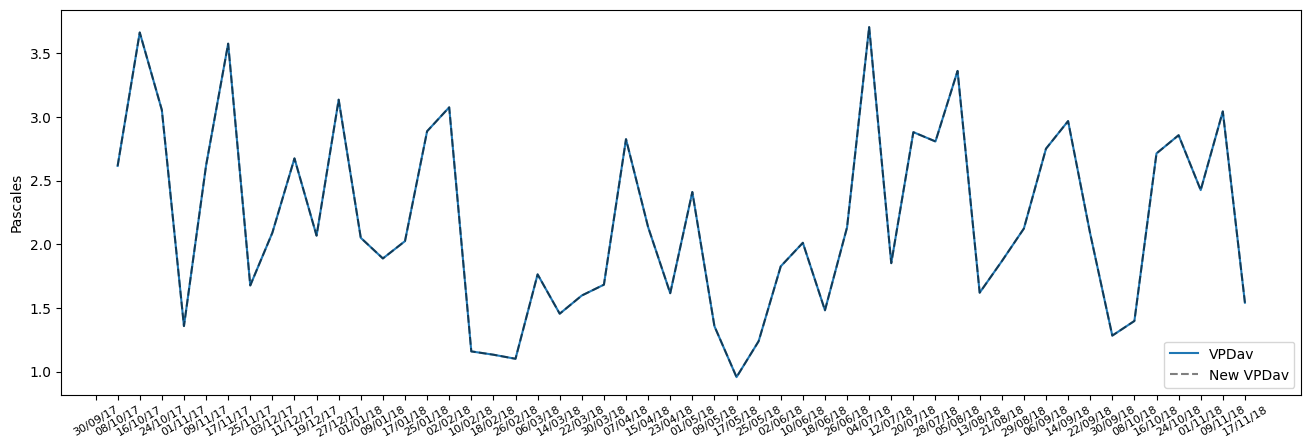

In [31]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 VPDav'])
plt.plot(df['Date'], df4['4 VPDav'], '--k', alpha = 0.5)
plt.legend(["VPDav", "New VPDav"], loc ="lower right")
plt.ylabel('Pascales')
plt.xticks(rotation=30, fontsize=8);

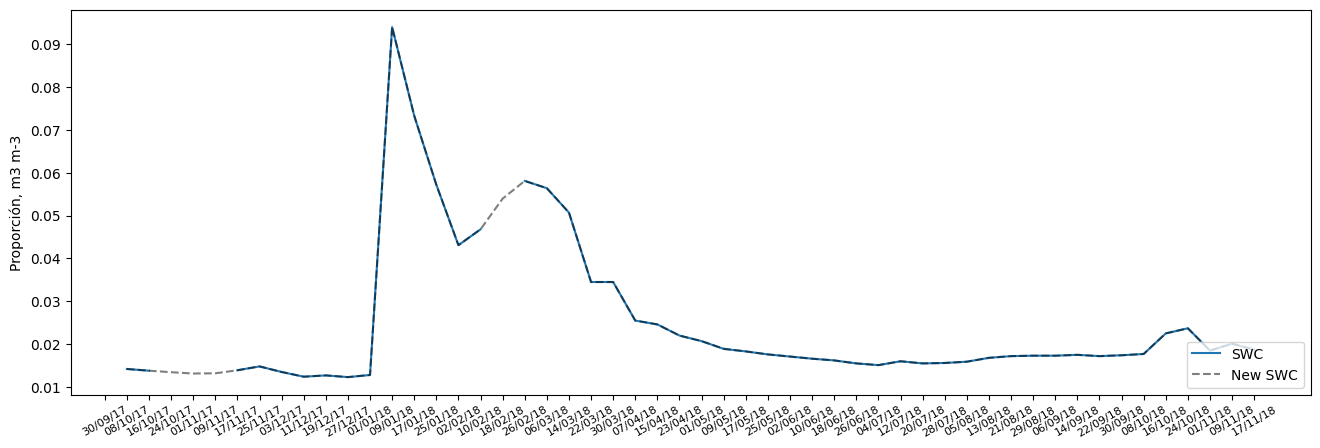

In [32]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 SWC'])
plt.plot(df['Date'], df4['4 SWC'], '--k', alpha = 0.5)
plt.legend(["SWC", "New SWC"], loc ="lower right")
plt.ylabel('Proporción, m3 m-3')
plt.xticks(rotation=30, fontsize=8);

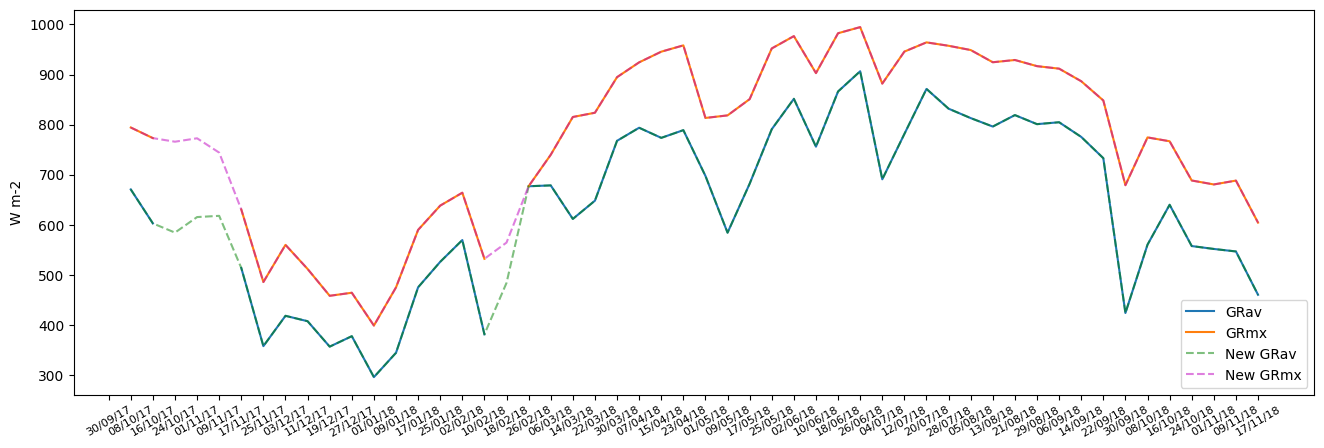

In [33]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 GRav'])
plt.plot(df['Date'], df['4 GRmx'])
plt.plot(df['Date'], df4['4 GRav'], '--g', alpha = 0.5)
plt.plot(df['Date'], df4['4 GRmx'], '--m', alpha = 0.5)
plt.legend(["GRav", "GRmx", "New GRav", "New GRmx"], loc ="lower right")
plt.ylabel('W m-2')
plt.xticks(rotation=30, fontsize=8);

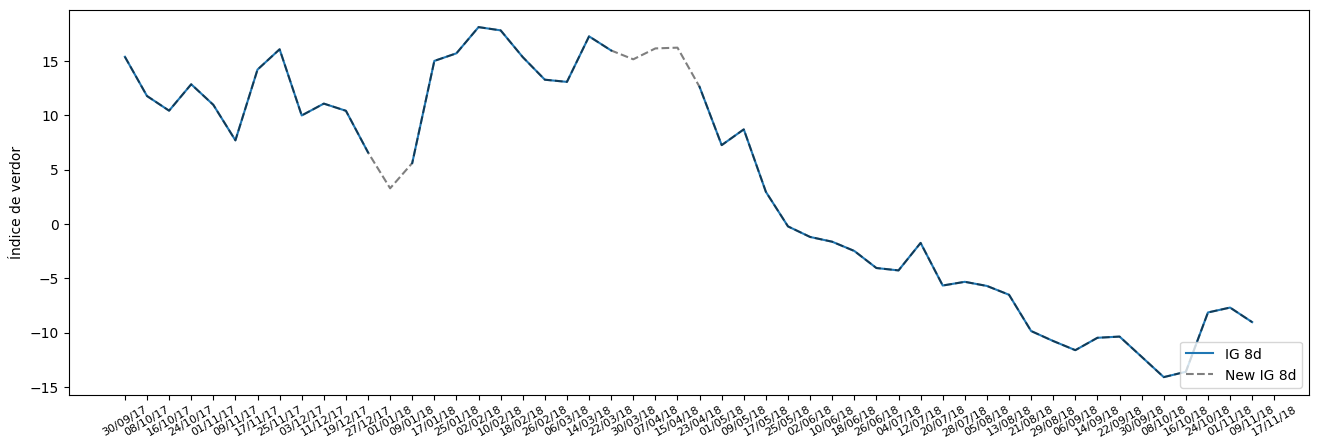

In [34]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 IG 8d'])
plt.plot(df['Date'], df4['4 IG 8d'], '--k', alpha = 0.5)
plt.legend(["IG 8d", "New IG 8d"], loc ="lower right")
plt.ylabel('Índice de verdor')
plt.xticks(rotation=30, fontsize=8);

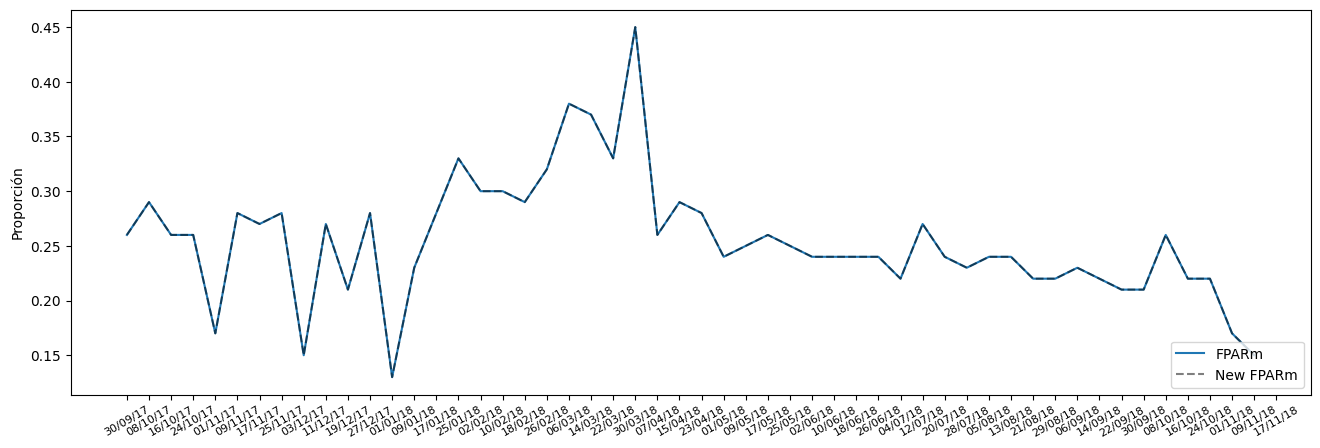

In [35]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 FPARm'])
plt.plot(df['Date'], df4['4 FPARm'], '--k', alpha = 0.5)
plt.legend(["FPARm", "New FPARm"], loc ="lower right")
plt.ylabel('Proporción')
plt.xticks(rotation=30, fontsize=8);

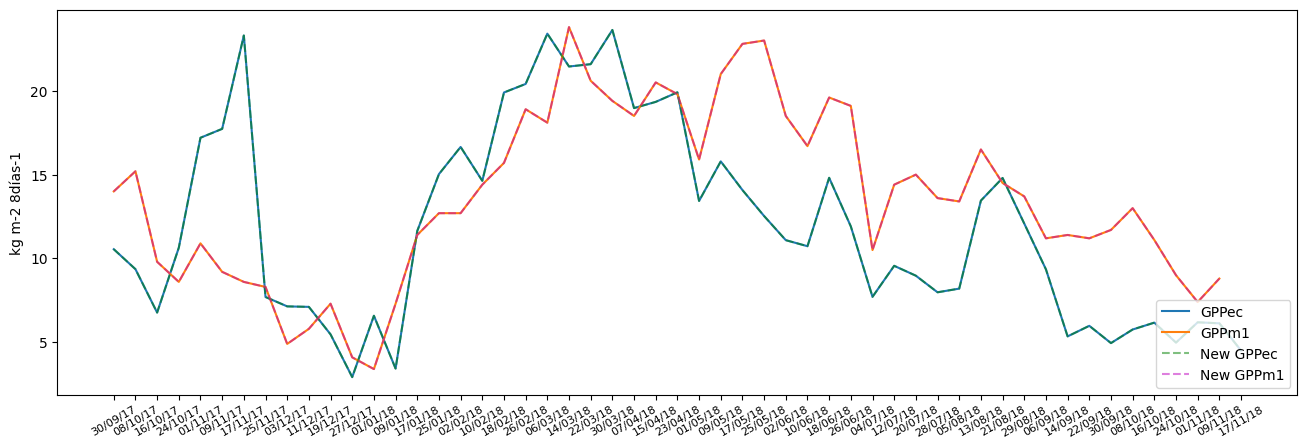

In [36]:
fig = plt.subplots(figsize=(16, 5))

plt.plot(df['Date'], df['4 GPPec'])
plt.plot(df['Date'], df['4 GPPm1'])
plt.plot(df['Date'], df4['4 GPPec'], '--g', alpha = 0.5)
plt.plot(df['Date'], df4['4 GPPm1'], '--m', alpha = 0.5)
plt.legend(["GPPec", "GPPm1", "New GPPec", "New GPPm1"], loc ="lower right")
plt.ylabel('kg m-2 8días-1')
plt.xticks(rotation=30, fontsize=8);

## Modelos de regresión lineal simple y múltiple